In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

In [2]:
#rule 이진법함수
def get_wolfram_rule( rule_number ):
    '''
    Gets the mapping for the given rule.
    Each rule is essentially the binary version of the rule number
    '''
    binary_rep = str(bin(rule_number))[2:]
    # prepend 0s so that the are 8 bits
    binary_rep = [0]*(8-len(binary_rep)) + [int(b) for b in binary_rep]

    mapping = {
         (0,0,0): binary_rep[7],
         (0,0,1): binary_rep[6],
         (0,1,0): binary_rep[5],
         (0,1,1): binary_rep[4],
         (1,0,0): binary_rep[3],
         (1,0,1): binary_rep[2],
         (1,1,0): binary_rep[1],
         (1,1,1): binary_rep[0],
    }

    return mapping


In [3]:
#다음세대 계산함수
def get_next_seq(previous_seq, rule):
    '''
    Use a rule to generate the next sequence for an automoton
    '''

    seq_length = len(previous_seq) - 2
#     rule_length = len(rule.keys()[0])
    rule_length = 3
    sub_seqs = [tuple(previous_seq[i:i + rule_length]) for i in range(0, seq_length)]
    new_seq = [rule[sub_seq] for sub_seq in sub_seqs]

    # Zero pad the ends
    new_seq.insert(0, 0)
    new_seq.append(0)
    return new_seq

In [4]:
def rule_data(rule_num,init_num, seed_num):
    rand.seed(seed_num)
    idx = rand.choice(400 ,init_num ,replace=False) # 0,1로 이루어준 길이 400벡터
    prev = np.zeros(1400) # 프리 바운더리 조건
    prev[500+idx] =1

    num_gens = 400 # 400세대까지
    data = []

    for i in range(num_gens):
      data.append(prev)
      prev = get_next_seq(prev, get_wolfram_rule(rule_num))

    data = np.array(data)
    data = data[:,500:900]
    y=np.sum(data,axis = 1) #세대별 1의 갯수를 셈
    return y

In [5]:
def rule_graph(rule_num, init_num):
    x=list(range(400))
    y=np.zeros(400)
    for e in range(10):
        y+= rule_data(rule_num,init_num, e)
    y= y/10 #10번 시행한후 평균


    mean = np.mean(y) #평균
    std = np.std(y) #표준편차

    plt.axhline(y=mean,xmin=0, xmax=400,color='r',linestyle='dashed', label='Average= %s'%(round(mean)))
    plt.plot(x,y)
    plt.ylim([0, 400])
    plt.legend(['Average= %s'%(round(mean)), 'std= %s'%(round(std))])
    plt.title('rule number :%s '%int(rule_num))

    return [rule_num, round(mean), round(std)]



[30, 200, 7]


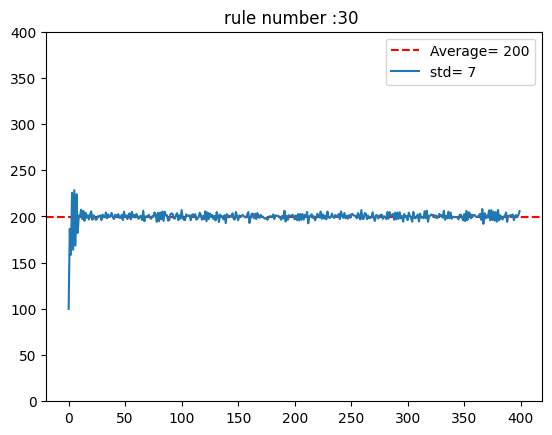

In [7]:
A= rule_graph(30,100)
print(A)

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import openpyxl
wb = openpyxl.Workbook()
new_filename = '/content/gdrive/MyDrive/CA model/CA rule Mstd.xlsx'
Sheet = wb.active
for rule in range(0,256,2):
  subject = rule_graph(rule,100)
  Sheet.append(subject)
wb.save(new_filename)